## A/B Testing on Datacamp
## 07/01/2023
---

There are notes of Datacamp - A/B Testing in Python. Course link is available [here](https://campus.datacamp.com/courses/ab-testing-in-python)

### Table of Content
1) Overview of A/B Testing  
2) Experiment Design & Planning  
3) Data Processing, Sanity Checks and Results Analysis  
4) Practical Considerations and Making Decisions  
---

### **1) Overview of A/B Testing**  
* What is A/B Testing  
    * An experiment designed to test which version is better 
    * **based on metric(s)** depending on the case  
    * using **random assigment** & analyzing results  
       
    * **Fundamental steps**  
        * Specify the goal & designs/ experiences  
        * *Randomly* sample users for enrollment  
        * *Randomly* assign users to:  
            * *control variant:* current state  
            * *treatment/test variant(s):* new design  
        * Log user actions & compute metrics  
        * Test for statistically significant differences  
    
    * *Randomization* provides:
        * generalizability & representativeness
        * minimizing bias between groups
        * establishing causality by isolating treatment effect
* Why run experiments?
    * **The value of A/B Testing:**
        * Reduce uncertainty around the impact of new designs and features
        * Decision-making --> scientific, evidence-based -not intuition
        * Generous value for the investment: simple changes lead to major wins
        * Continous optimization at the mature stage of the business
        
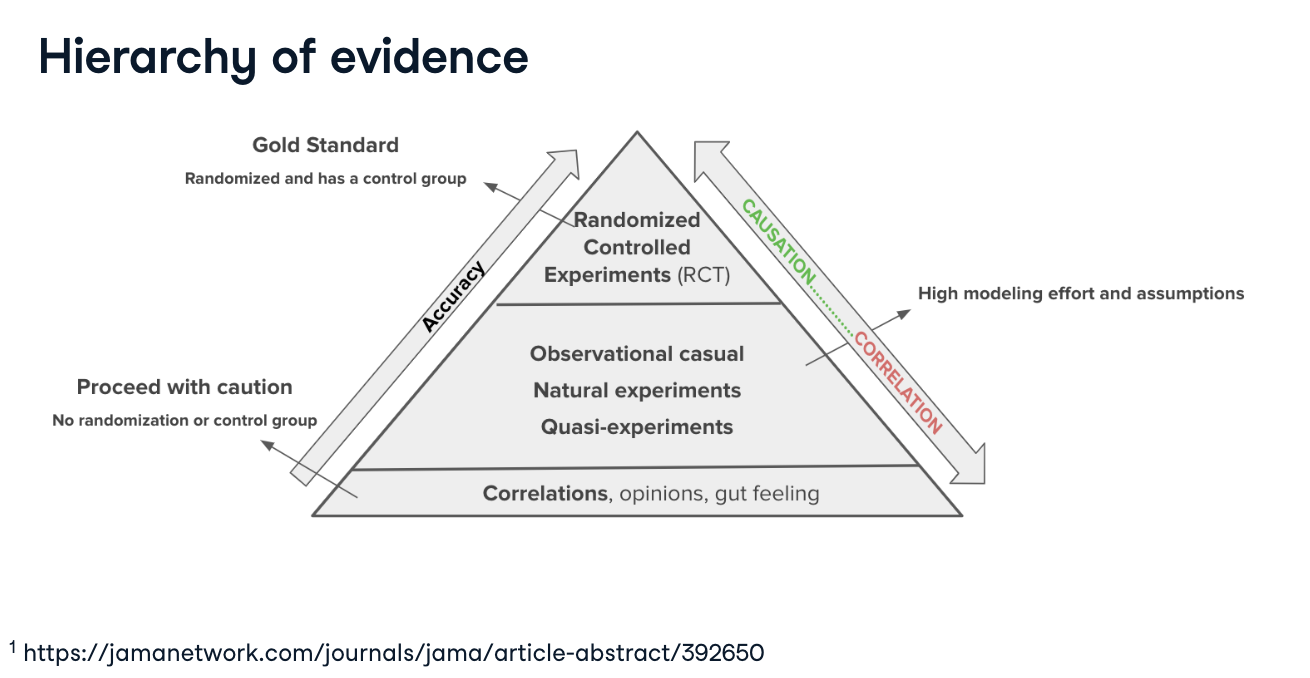
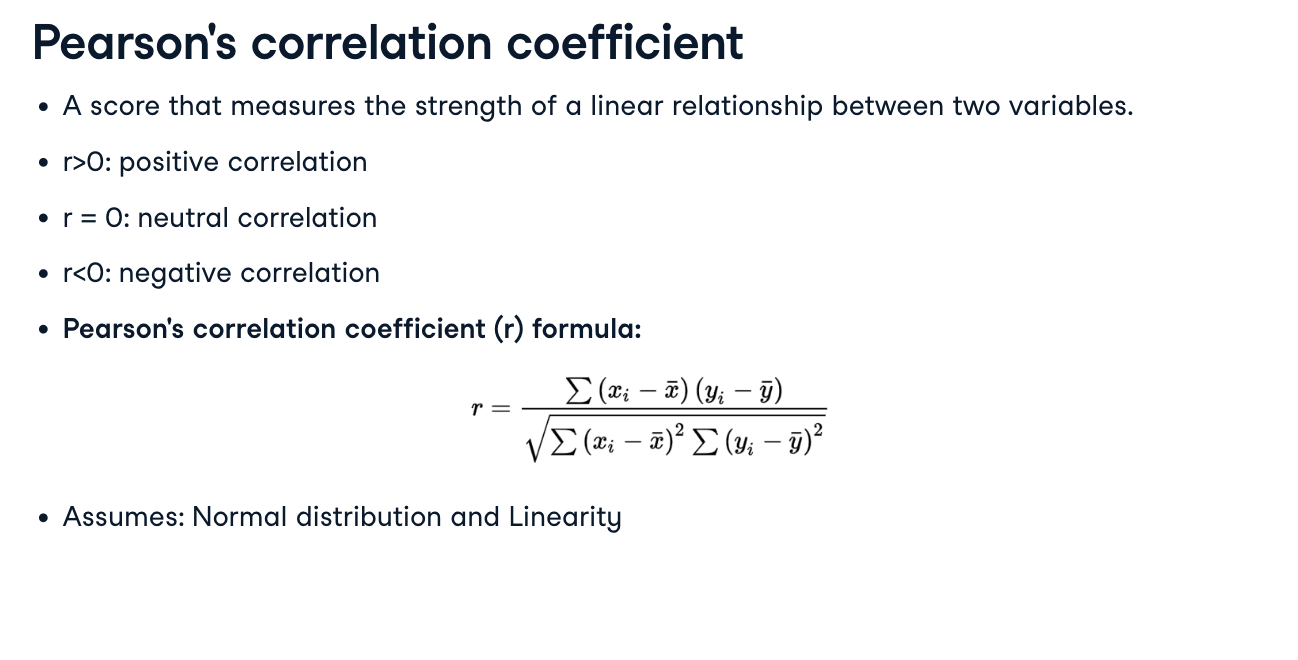

* Correlations visual inspection may be conducted by seaborn pairplot, Pearson correlation heatmap.

* Types of metrics
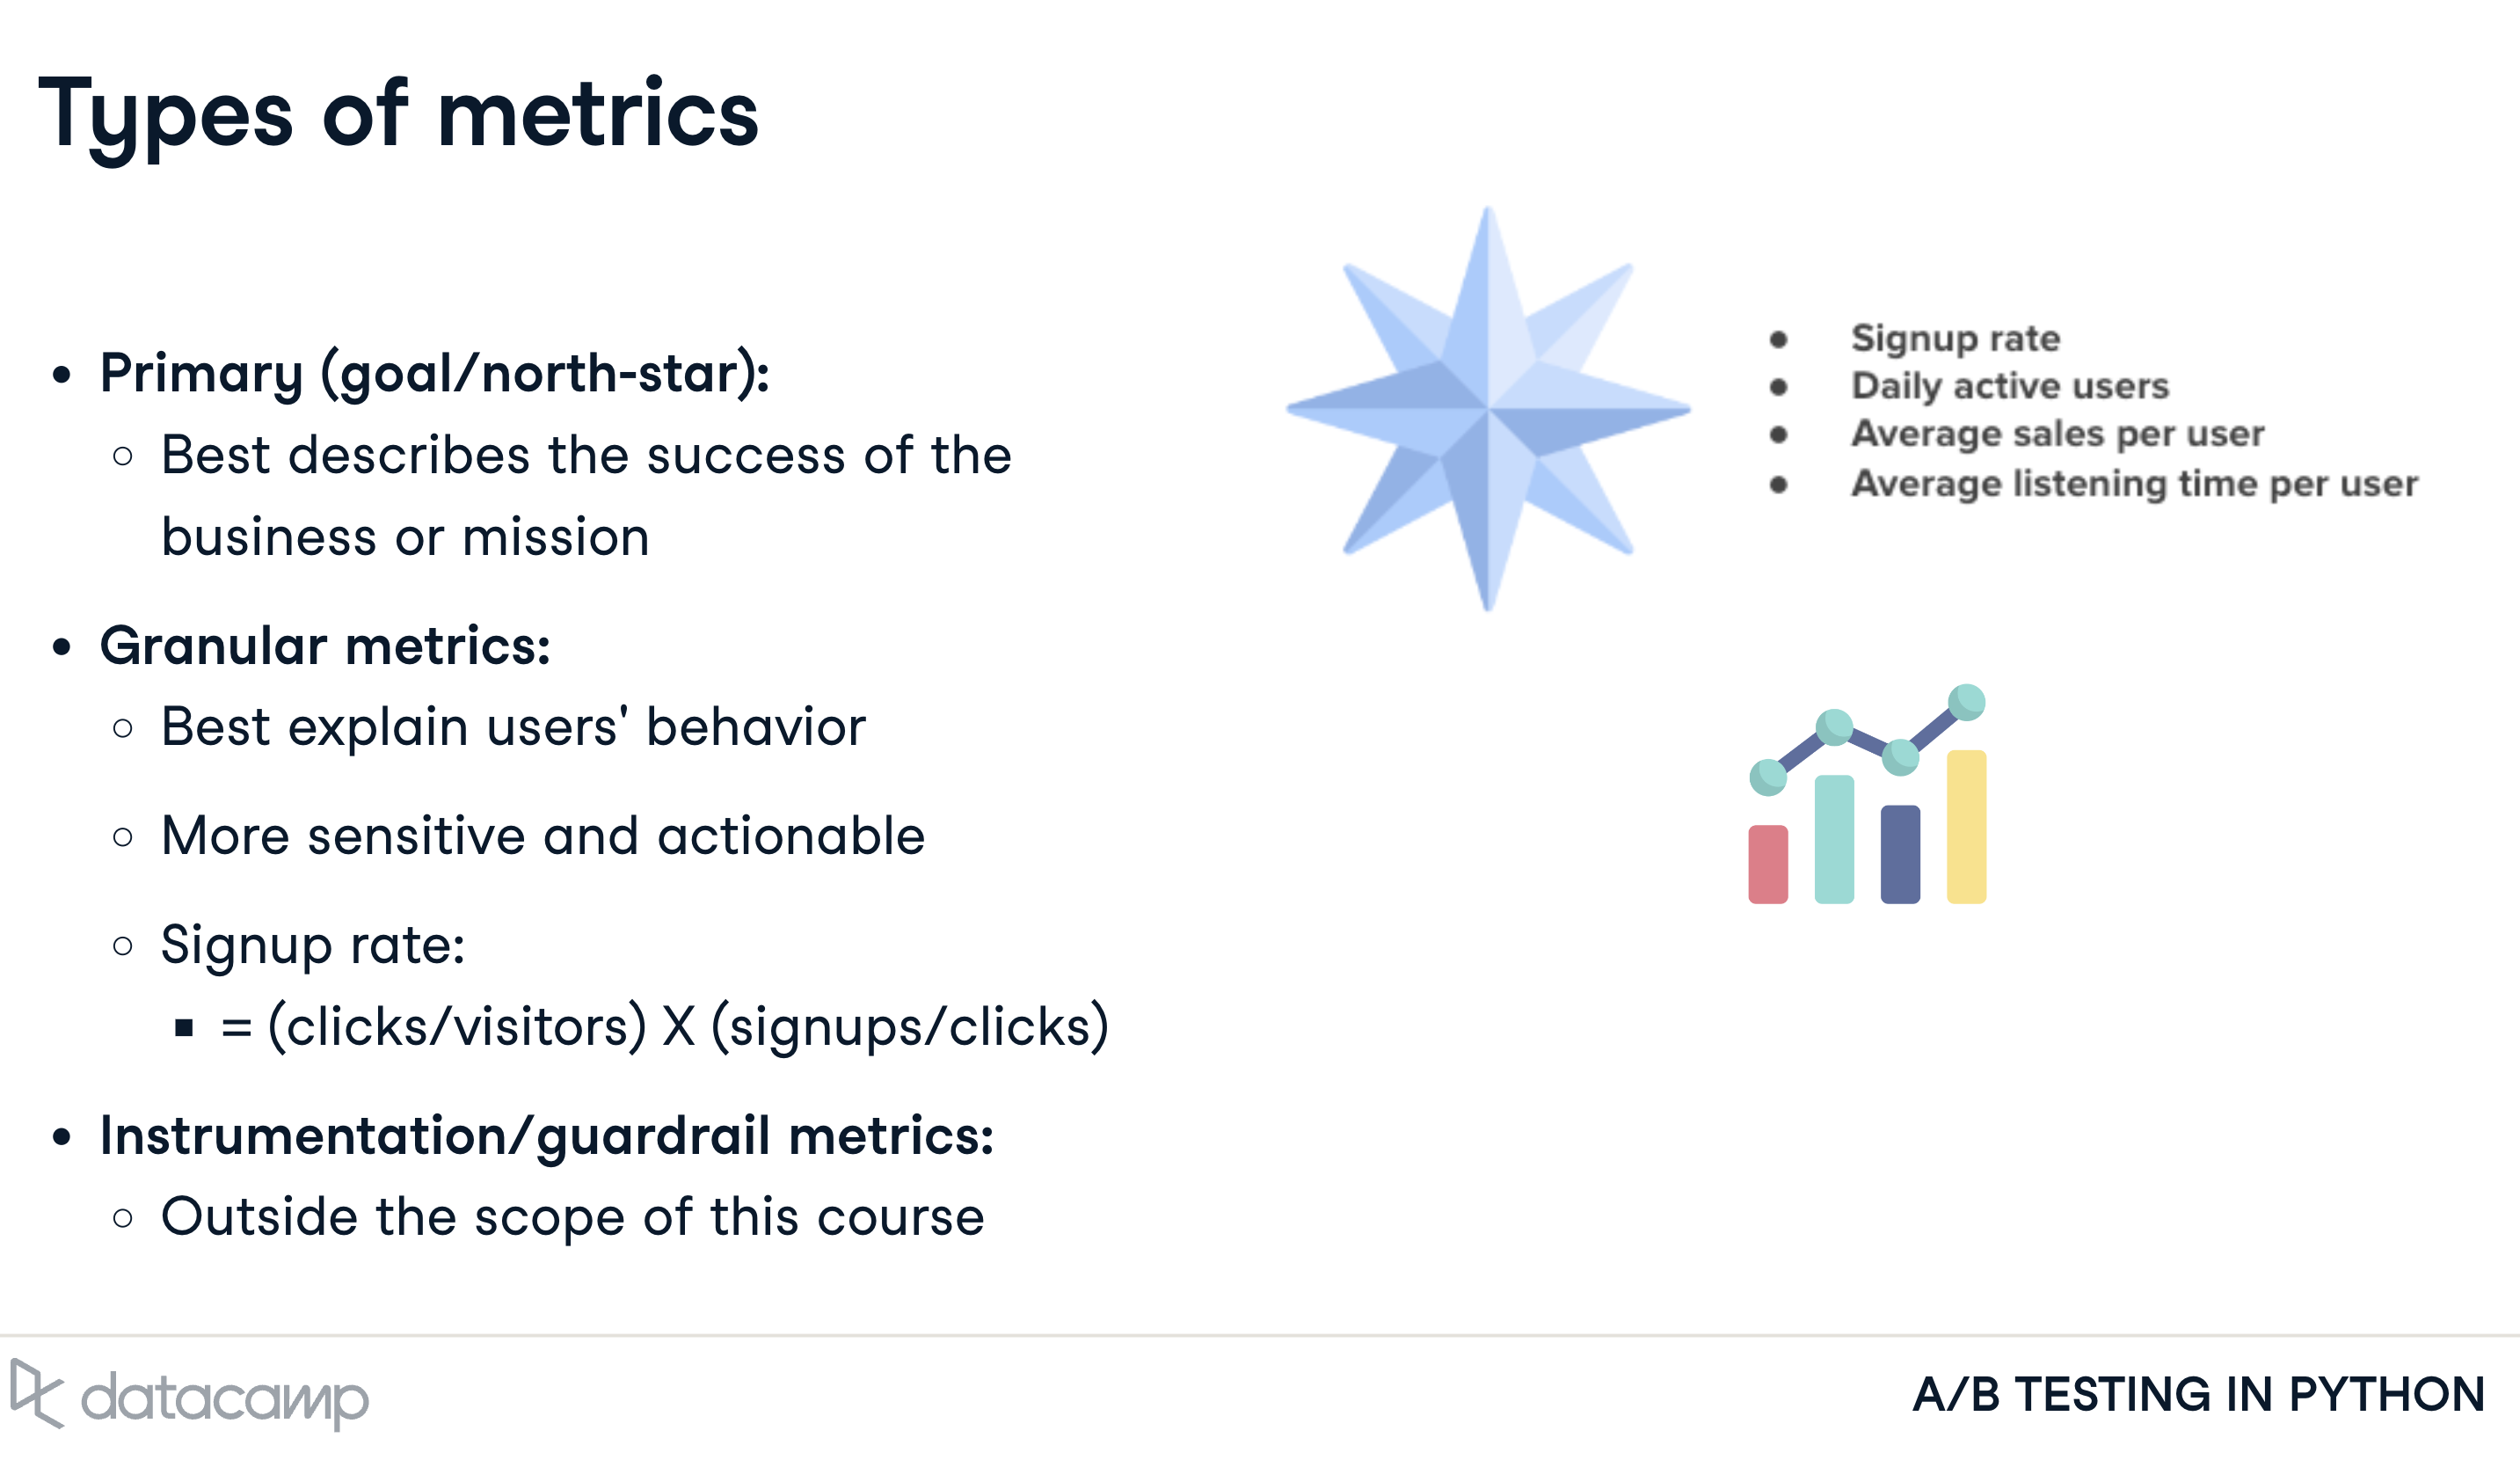
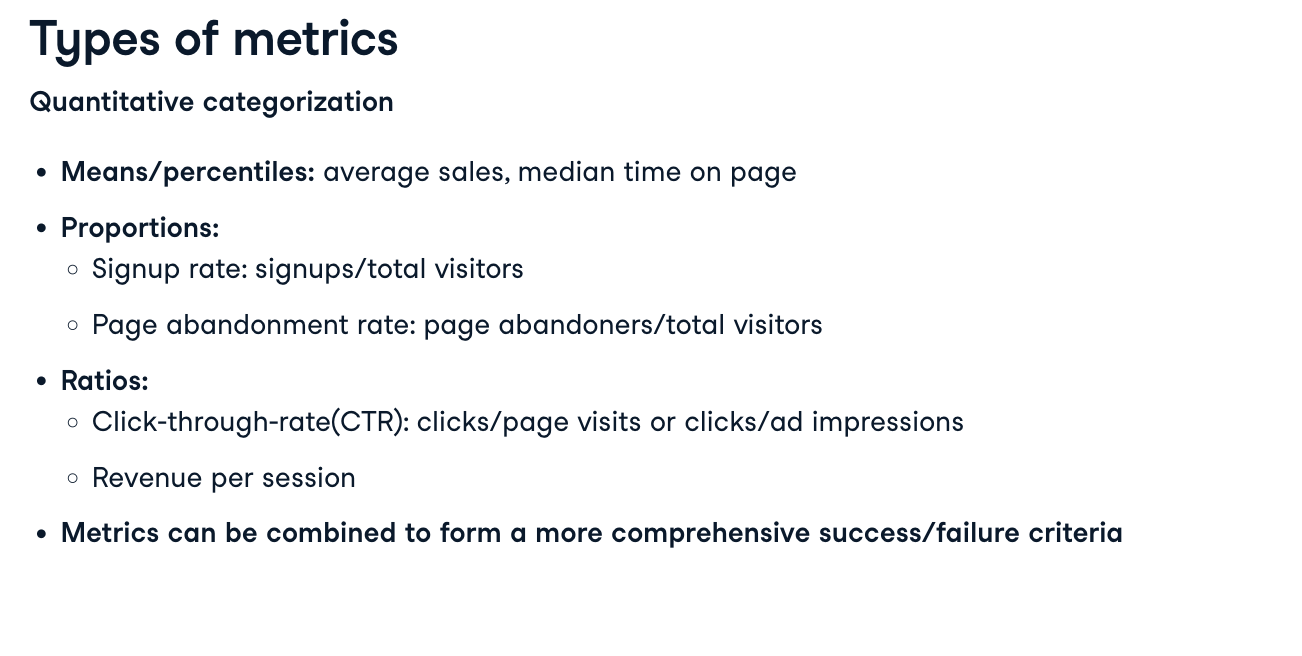
    * Metrics requirements
        * **Stable/robust** against the unimportant differences
        * **Sensitive** to the important changes
        * **Measurable** within logging limitations
        * **Non-gameable**
            * Bright colors
            * Time on page

---

### **2) Experiment Design & Planning**
* A hypothesis is:
    * a statement explanining an event
    * a starting point for further investigation
    * an idea we want to test
* **A strong hypothesis:**
    * *is testable, declarative, concise, and logical*
    * *enables systematic iteration*
    * *is easier to generalize and confirm understanding*
    * *results in actionable/focused recommendations*
* Hypothesis format:
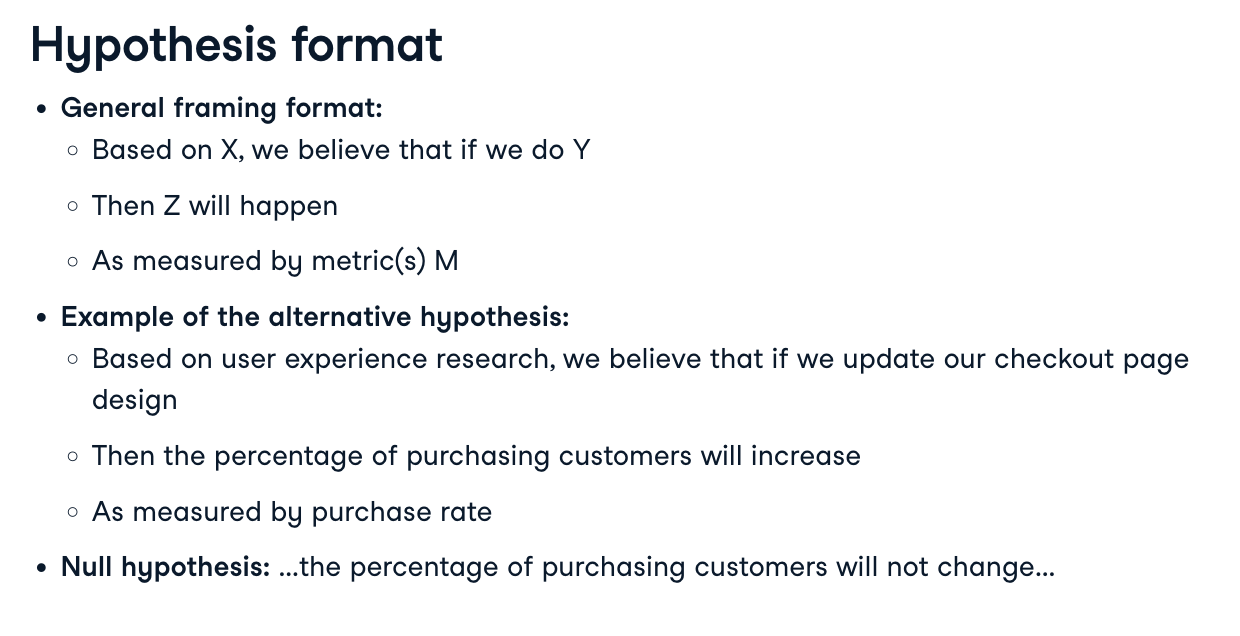

In [28]:
import pandas as pd
import numpy as np

# Define the number of samples for each group
num_samples_per_group = 3000

# Generate random values for checkout_page for Group A
checkout_page_values_group_a = np.full(num_samples_per_group, 'A')

# Generate random values for checkout_page for Group B
checkout_page_values_group_b = np.full(num_samples_per_group, 'B')

# Concatenate the checkout_page values for both groups
checkout_page_values = np.concatenate((checkout_page_values_group_a, checkout_page_values_group_b))

# Shuffle the checkout_page values randomly
np.random.shuffle(checkout_page_values)

# Generate random values for purchased
purchased_values = np.random.randint(0, 2, size=num_samples_per_group * 2)

# Create the DataFrame
checkout = pd.DataFrame({'checkout_page': checkout_page_values,
                         'purchased': purchased_values})

# Display the DataFrame
checkout.head()

,checkout_page,purchased
0,A,1
1,B,0
2,A,1
3,A,0
4,B,1


In [29]:
# Calculate the number of users in groups A and B
n_A = checkout[checkout['checkout_page'] == 'A']['purchased'].count()
n_B = checkout[checkout['checkout_page'] == 'B']['purchased'].count()

In [30]:
print('Group A users: ', n_A)
print('Group B users: ', n_B)

Group A users:  3000
Group B users:  3000


In [31]:
# Calculate the mean purchase_rates of groups A and B
p_A = checkout[checkout['checkout_page'] == 'A']['purchased'].mean()
p_B = checkout[checkout['checkout_page'] == 'B']['purchased'].mean()

In [32]:
print('Group A mean purchase rate: ', np.round(p_A, 5))
print('Group B mean purchase rate: ', np.round(p_B, 5))

Group A mean purchase rate:  0.49133
Group B mean purchase rate:  0.51067


* The number of purchasers in **n** trials with purchasing probability **p** is Binomially distributed.

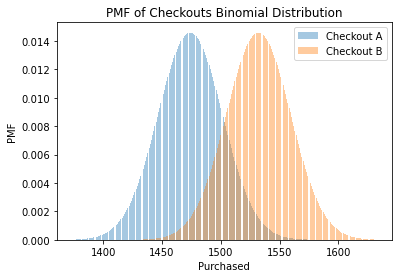

In [34]:
# Import binom from scipy library
from scipy.stats import binom
import matplotlib.pyplot as plt

# Create x-axis range & Binomial distribution A and B
x= np.arange(n_A*p_A - 100, n_B*p_B + 100)
binom_A = binom.pmf(x, n_A, p_A) 
binom_B = binom.pmf(x, n_B, p_B)

# Plot Binomial distributions A and B
plt.bar(x, binom_A, alpha=0.4, label='Checkout A')
plt.bar(x, binom_B, alpha=0.4, label='Checkout B')
plt.xlabel('Purchased')
plt.ylabel('PMF')
plt.title('PMF of Checkouts Binomial Distribution')
plt.legend()
plt.show()

---
* 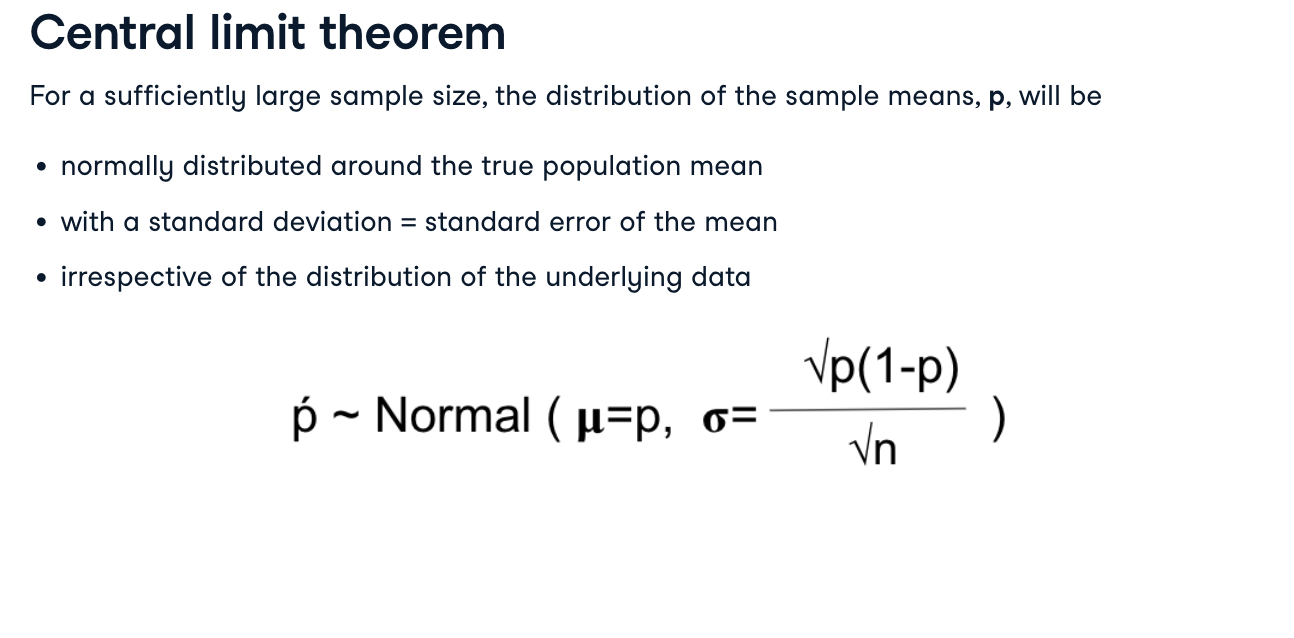

/Users/gamzekecibas/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gamzekecibas/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gamzekecibas/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

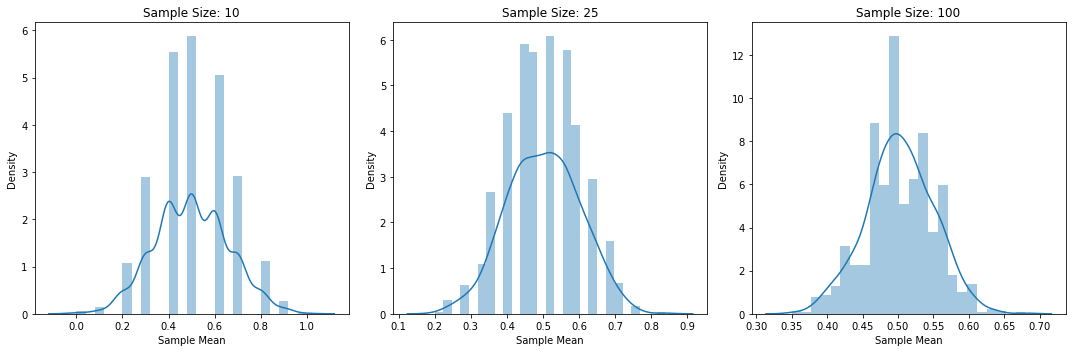

In [35]:
import seaborn as sns

# Set random seed for repeatability
np.random.seed(98)

# Define sample sizes
sample_sizes = [10, 25, 100]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Create loop to simulate sample means for each sample size
for i, n in enumerate(sample_sizes):
    # Create an empty list to hold means
    sampled_means = []
    
    # Create loop to simulate 1000 sample means
    for _ in range(1000):
        # Take a sample of size n
        sample = checkout['purchased'].sample(n, replace=True)
        # Get the sample mean and append to the list
        sample_mean = np.mean(sample)
        sampled_means.append(sample_mean)

    # Plot distribution
    sns.distplot(sampled_means, kde=True, ax=axs[i])
    axs[i].set_title(f'Sample Size: {n}')
    axs[i].set_xlabel('Sample Mean')
    axs[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

/Users/gamzekecibas/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/gamzekecibas/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



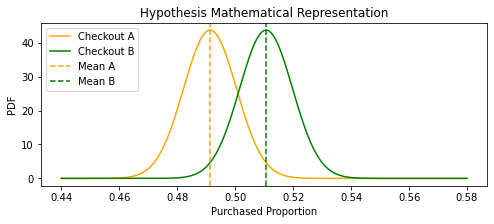

In [50]:
# Hypothesis mathematical representation
from scipy.stats import norm

plt.figure(figsize=(8, 3))
# Create x-axis range
x = np.linspace(0.44, 0.58, 500)

# Calculate the normal distribution for Group A
norm_A = norm.pdf(x, p_A, np.sqrt(p_A * (1 - p_A) / n_A))

# Calculate the normal distribution for Group B
norm_B = norm.pdf(x, p_B, np.sqrt(p_B * (1 - p_B) / n_B))

# Plot normal distributions A and B
sns.lineplot(x, norm_A, color='orange', label='Checkout A')
sns.lineplot(x, norm_B, color='green', label='Checkout B')

# Add vertical lines for means
plt.axvline(p_A, linestyle="--", color='orange', label='Mean A')
plt.axvline(p_B, linestyle="--", color='green', label='Mean B')

plt.xlabel('Purchased Proportion')
plt.ylabel('PDF')
plt.legend(loc='upper left')
plt.title('Hypothesis Mathematical Representation')
plt.show()

* **Setting up Testing Parameters**

* ***Distribution Parameters:***  
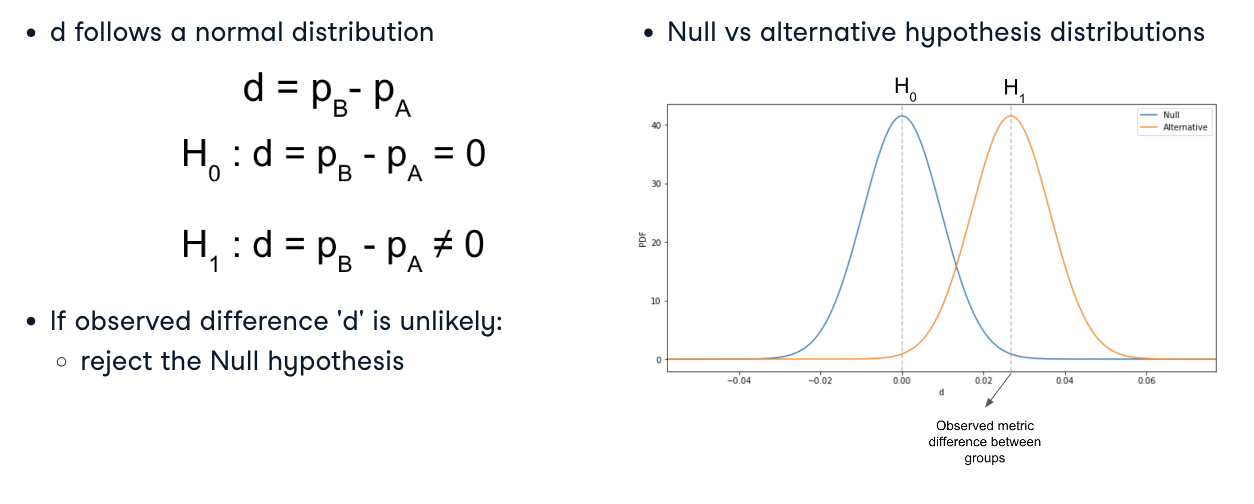  
* ***Design Parameters and Error Types:***
    * **Power:**  
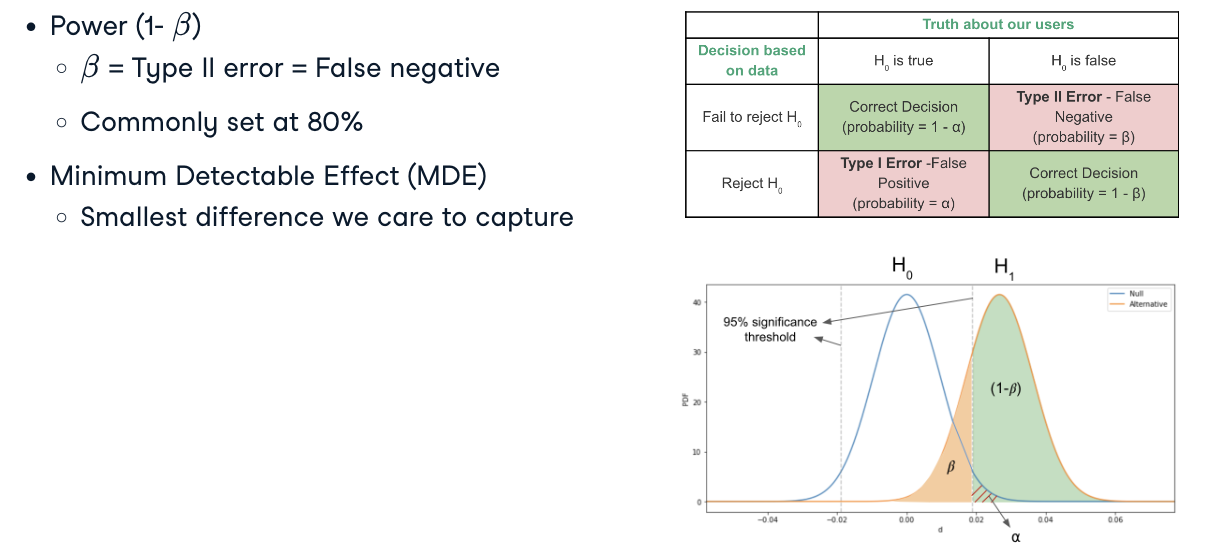
    * **Significance Level:**  
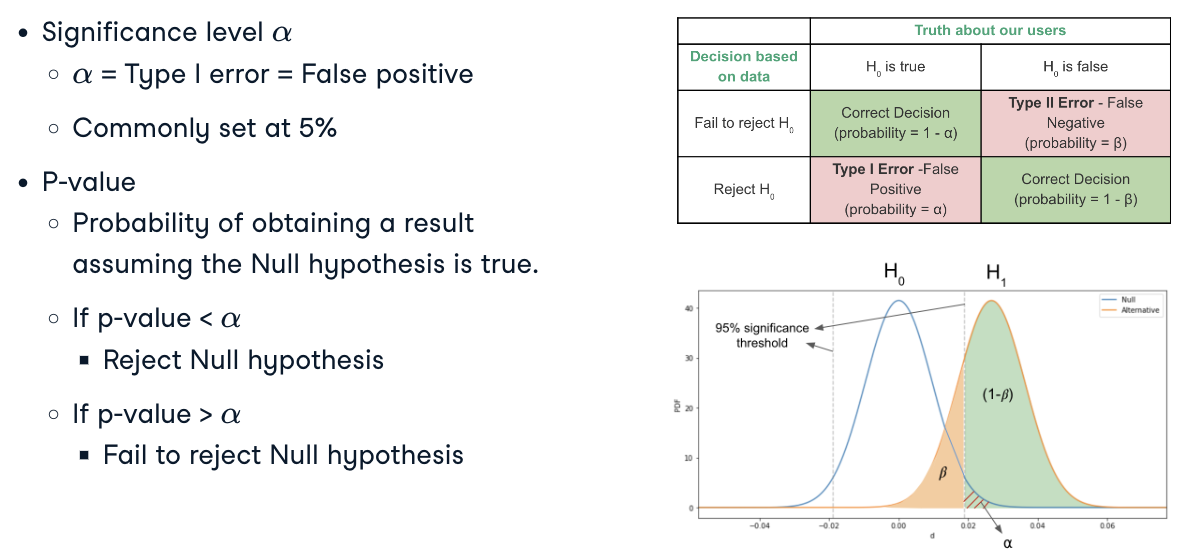  

* **Power Analysis**
* ***Effect Size***
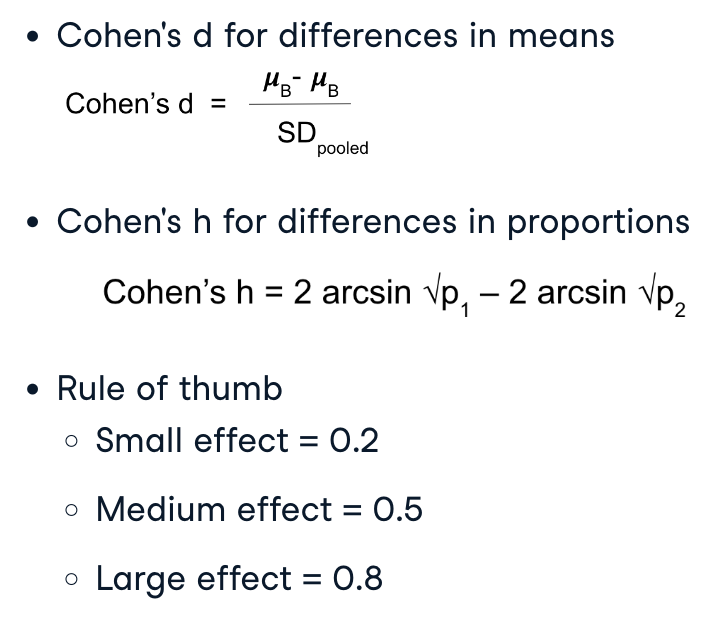

In [56]:
# Calculate standardize effect size
from statsmodels.stats.proportion import proportion_effectsize

effect_size_std = proportion_effectsize(0.33, 0.3)
print(effect_size_std)

0.06459994854032636


In [58]:
# Calculate standardize effect size for the case

purchased_es_std = proportion_effectsize(p_B, p_A)
print(purchased_es_std)

0.0386691532389829


In [60]:
# Sample size estimation for proportions
# Import power module
from statsmodels.stats import power

# Calculate sample size
sample_size = power.TTestIndPower().solve_power(effect_size=purchased_es_std, 
                                                power=80, alpha=0.05, 
                                                nobs1=None)
print(sample_size)

1337521190452432.0


<Figure size 576x216 with 0 Axes>

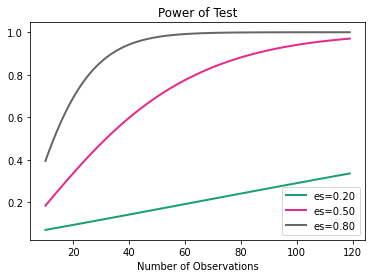

In [64]:
# Effect of sample size and MDE on power
# Import t-test power package
from statsmodels.stats.power import TTestIndPower

# Specify parameters for power analysis
sample_sizes = np.array(range(10, 120))
effect_sizes = np.array([0.2, 0.5, 0.8])

# Plot power curves
plt.figure(figsize=(8, 3))
TTestIndPower().plot_power(nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

In [68]:
# Sample size estimation for means

mean_A = checkout[checkout['checkout_page'] == 'A']['purchased'].mean()
print(f"Mean purchased of checkout page A: {mean_A}")

# Sample size estimation for standard deviations

std_A = checkout[checkout['checkout_page'] == 'A']['purchased'].std()
print(f"Std purchased of checkout page A: {mean_A}")

Mean purchased of checkout page A: 0.49133333333333334
Std purchased of checkout page A: 0.49133333333333334


In [70]:
# Specify the desired min avg purchased
mean_new = 0.65

# Calculate the standardized effect size
std_effect_size = (mean_new - mean_A) / std_A

print(std_effect_size)

0.3173281133517217


In [73]:
sample_size = power.TTestIndPower().solve_power(effect_size=std_effect_size,
                                               power=.8, alpha=.05,
                                               nobs1=None)

print(sample_size)

156.85661338966526


* **Multiple Comparisons Tests**
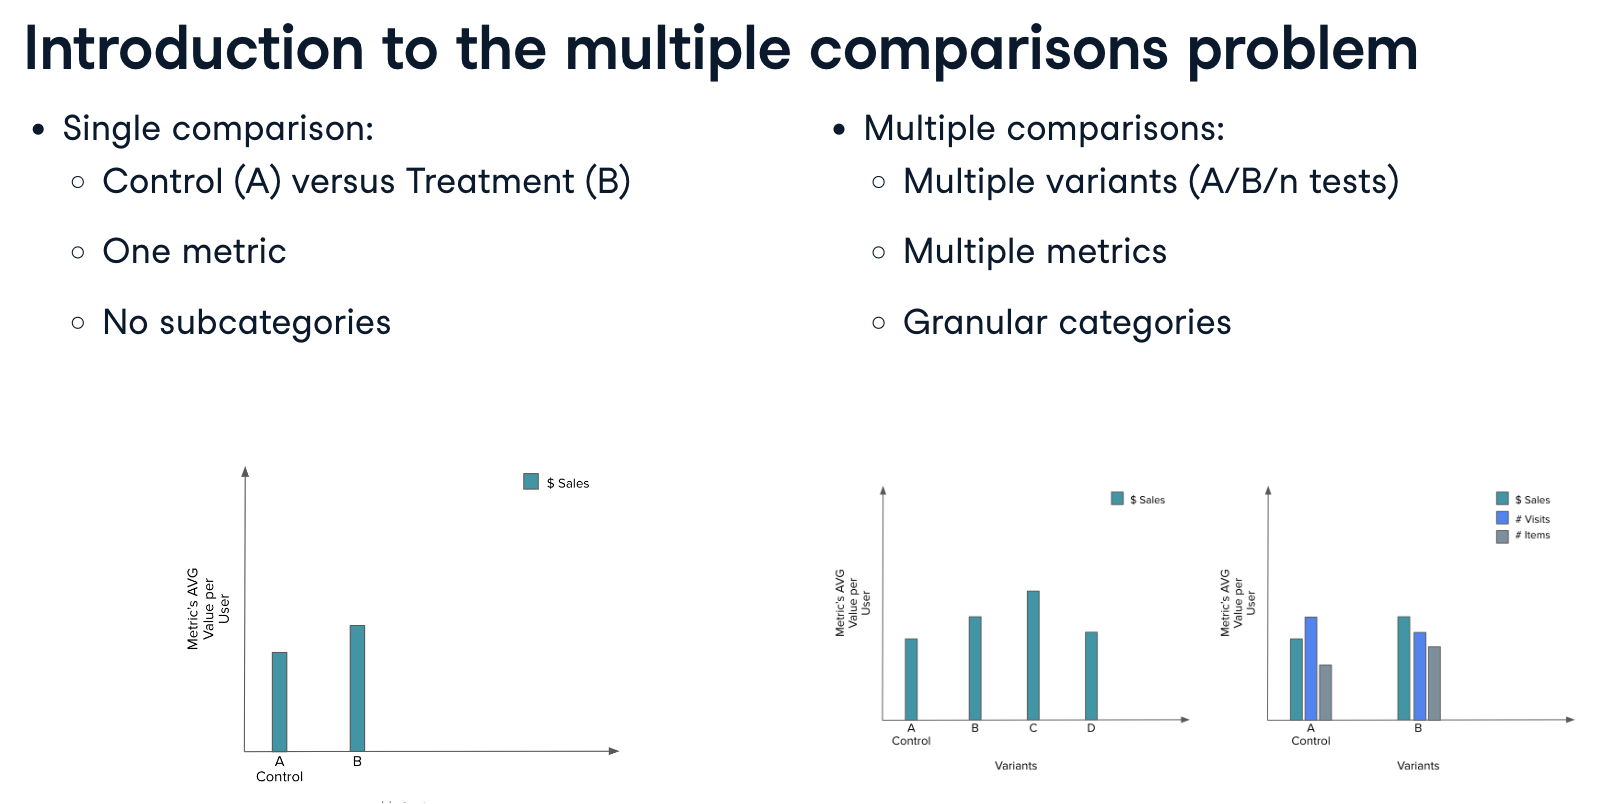  
    * ***Family-wise Error Rate (FWER):***  
    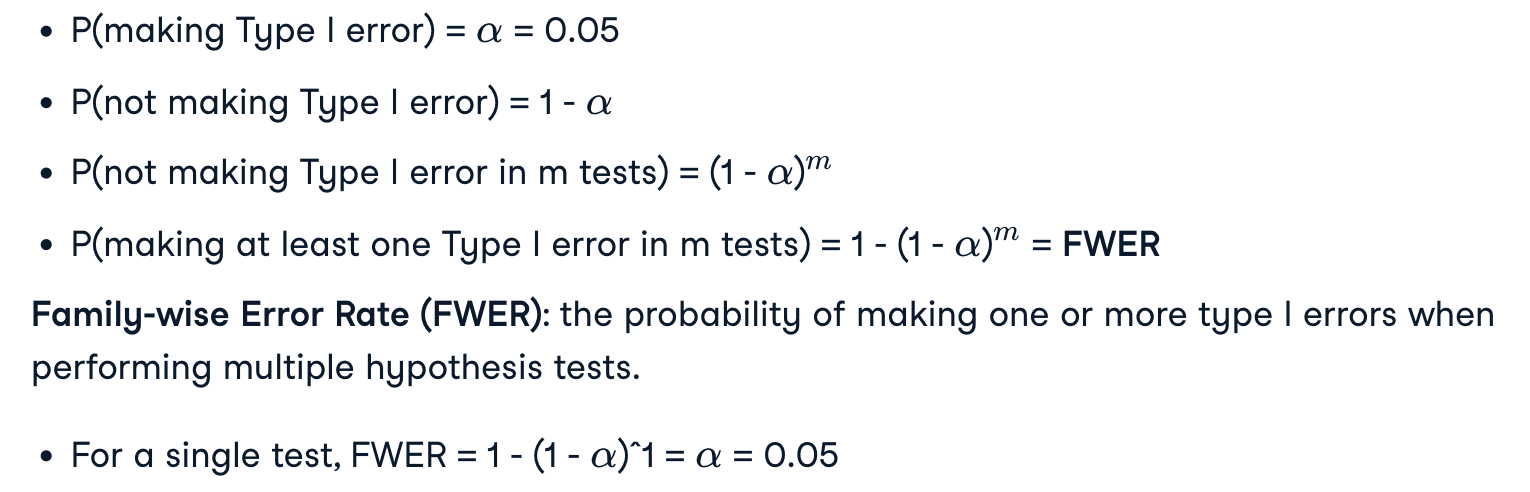
        * But what if we perform more than one test ??

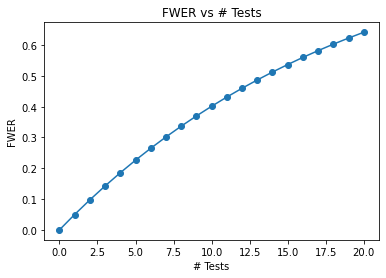

In [74]:
alpha = .05

x = np.linspace(0, 20, 21)
y = 1 - (1 - alpha) ** x

plt.plot(x, y, marker='o')
plt.title("FWER vs # Tests")
plt.xlabel("# Tests")
plt.ylabel("FWER")
plt.show()

# FWER for 10 tests = 40%

* ***Correction Methods:***
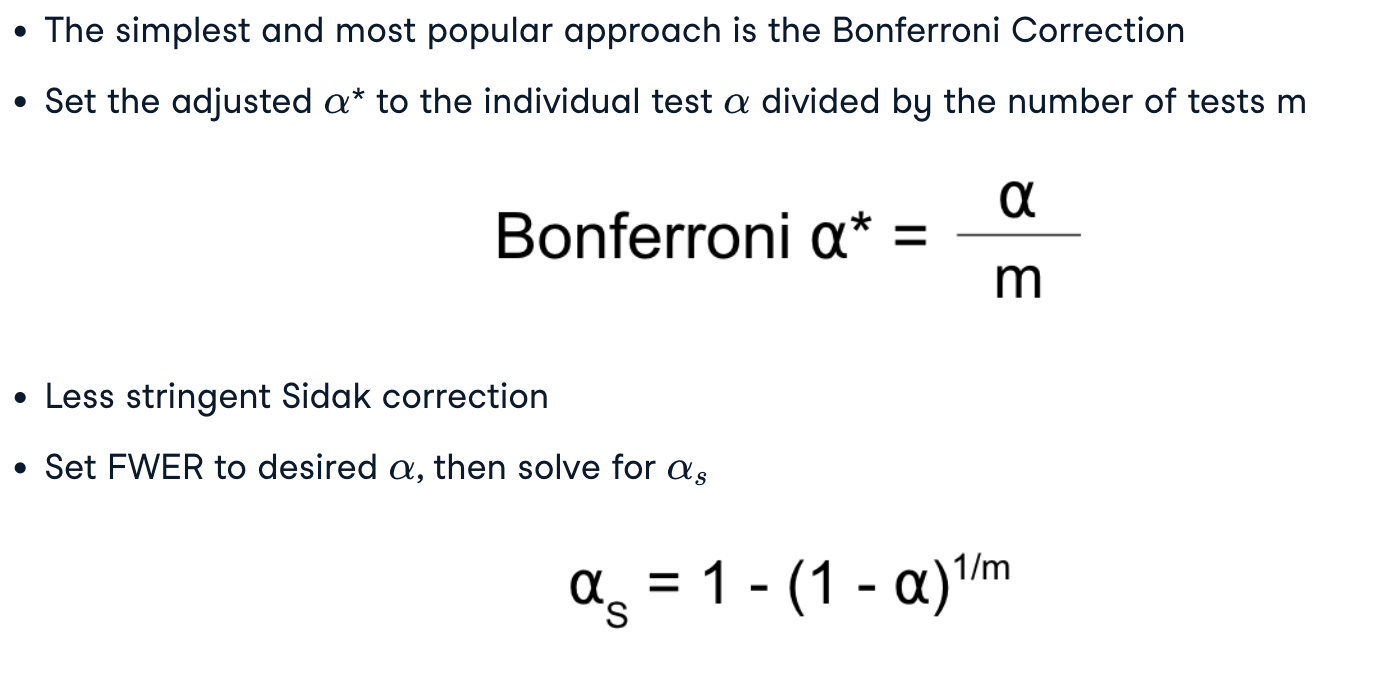  
---
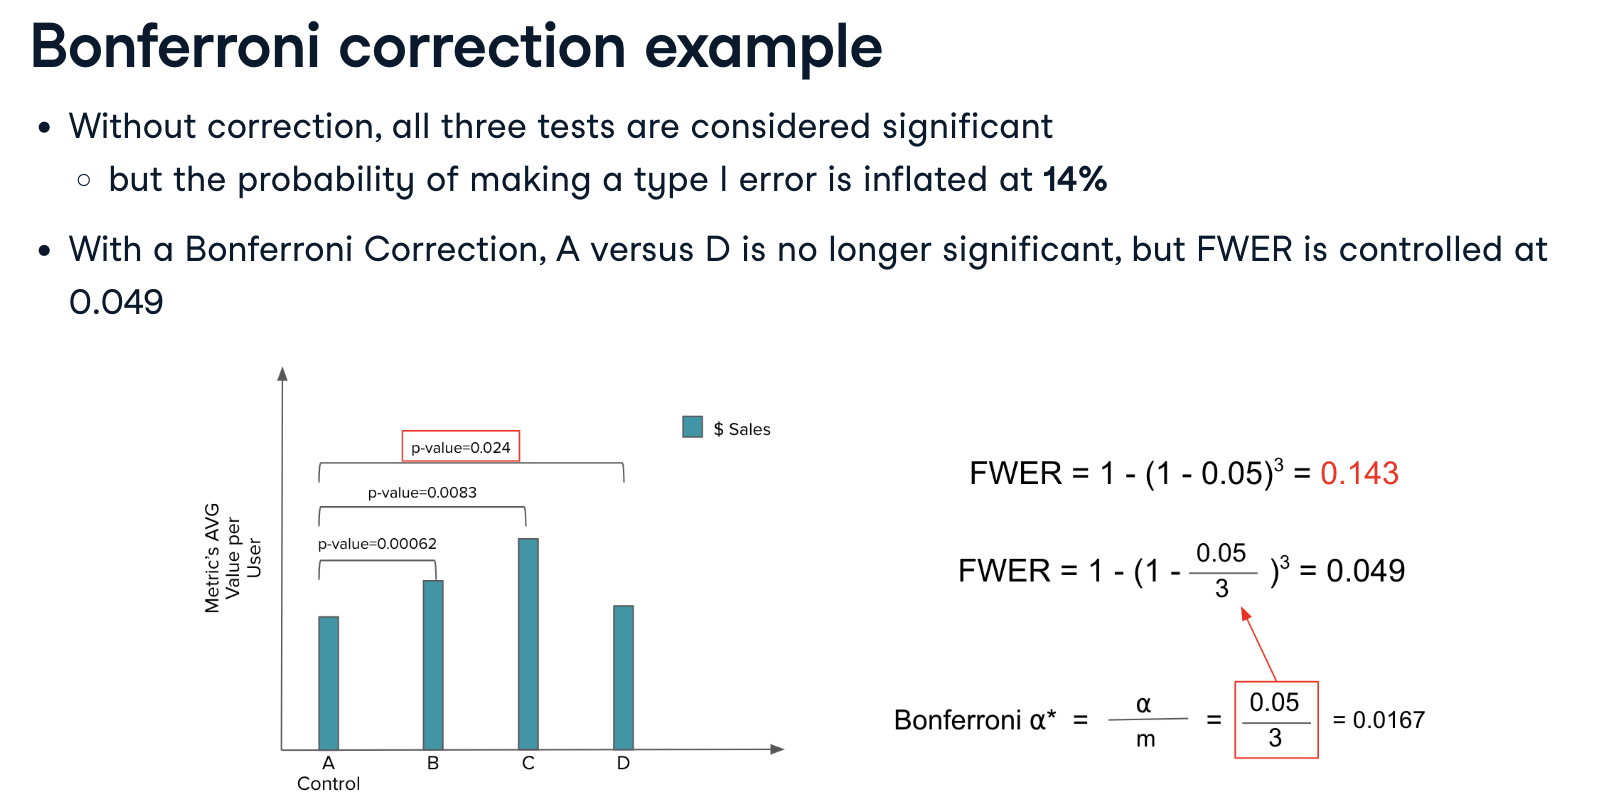

In [76]:
import statsmodels.stats.multitest as smt

pvals = [2.3e-2, 5e-4, 4e-5]

corrected = smt.multipletests(pvals, alpha=.05, method='bonferroni')

print("Significant Test: ", corrected[0])
print("Corrected p-vals: ", corrected[1])
print("Bonferroni Corrected alpha: {:.4f}".format(corrected[3]))

Significant Test:  [False  True  True]
Corrected p-vals:  [0.069   0.0015  0.00012]
Bonferroni Corrected alpha: 0.0167


### **3) Data Cleaning and Exploratory Analysis**

* **Missing Values**
> #Calculate the mean order value  
> checkout.order_value.mean()  
>  
> #Replace missing values with zeros and get mean  
> checkout['order_value'].fillna(0).mean()   
---    
* **Duplicates**
> #Check for duplicate rows due to logging issues  
> print(len(checkout))  
> print(len(checkout.drop_duplicates(keep='first')))
>   
> #Unique users in group B
> print(checkout[checkout['checkout_page'] == 'B']['user_id'].nunique())
>  
> #Unique users who purchased at least once
> print(checkout[checkout['checkout_page'] == 'B].groupby('user_id').['purchased'].max().sum())
>  
> #Total purchase events in group B. 
> print(checkout[checkout['checkput_page'] == 'B']['purchased'].sum())
---
* **EDA Summary Stats**
    * Mean, count, and std: df.groupby('col')['analyzed_col'].agg({'mean', 'std', 'count'}) --> vis by barplots, histograms, timeseries (line plots) etc.
---
* **Practice:**  
The Adsmart Kaggle dataset source is linked [here](https://www.kaggle.com/datasets/osuolaleemmanuel/ad-ab-testing/data).

In [78]:
data = pd.read_csv('AdSmartABdata - AdSmartABdata.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


<AxesSubplot:xlabel='date', ylabel='no'>

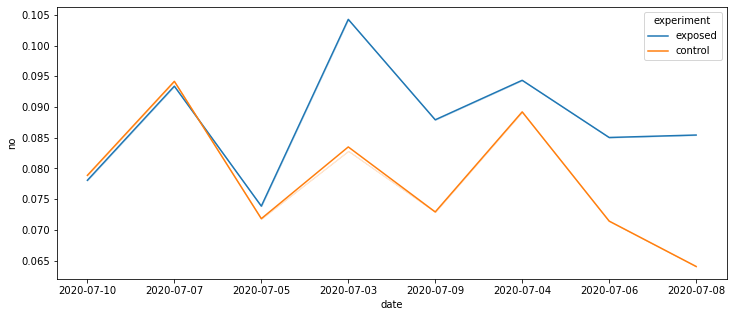

In [80]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=data, x='date', y='no', hue='experiment', ci=False)

In [84]:
# Check for duplicate rows due to logging issues 
first_samples, after_dup_samples = len(data), len(data.drop_duplicates(keep='first'))
print(f"Initial # data samples: {first_samples}")

if first_samples == after_dup_samples:
    print('There is no duplicates in this set.')
else:
    print(f"After dropping duplicates, # data samples: {after_dup_samples}")

Initial # data samples: 8077
There is no duplicates in this set.


**? - Question**  
*What is the most likely reason why the two last numbers are the same?* 

  
A) Since we are working with probabilities, this happened due to chance.  

B) Because we have no duplicate user_ids in the dataset.  

<span style="color:green">**C) Because there are no duplicate user_ids and the signup event can only happen once per user.**</span>


---
* **Sanity Checks: Internal Validity**

* Sample Ratio Mismatch (SRM):
    - 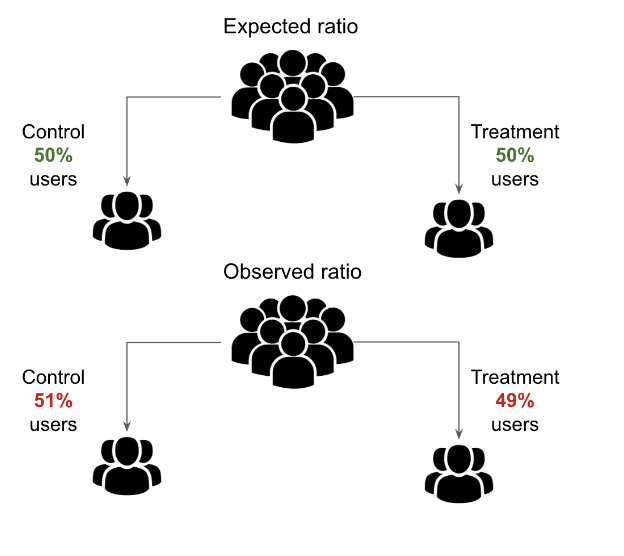
    - Allocation across variants deviates from design
    - Chi-square goodness of fit test
        - $$
X^2 = \sum \frac{{(Observed - Expected)^2}}{{Expected}}
$$
    - Example with AdSmart data:


In [85]:
# Calculate the unique IDs per variant
data.groupby('experiment')['auction_id'].nunique()

experiment
control    4071
exposed    4006
Name: auction_id, dtype: int64

In [88]:
# Assign the unique counts to each variant
control_users = data[data['experiment'] == 'control']['auction_id'].nunique()
exposed_users = data[data['experiment'] == 'exposed']['auction_id'].nunique()

total_users = control_users + exposed_users

In [89]:
# Calculate allocation ratios per variant
control_perc = control_users / total_users
exposed_perc = exposed_users / total_users

print("Percentage of users in the Control group:", 100*round(control_perc, 5), "%")
print("Percentage of users in the Exposed group:", 100*round(exposed_perc, 5), "%")

Percentage of users in the Control group: 50.402 %
Percentage of users in the Exposed group: 49.598 %


In [90]:
# Create lists of observed and expected counts per variant

observed = [ control_users, exposed_users]
expected = [ total_users/2, total_users/2]

In [93]:
# Import chisquare from scipy library
from scipy.stats import chisquare

# Run chisquare test on observed and expected lists
chi = chisquare(observed, f_exp=expected)

# Print test results and interpretation
print(chi, '\n')

if chi[1] < 0.01:
    print("SRM may be present!")
else:
    print("SRM likely not present!")

Power_divergenceResult(statistic=0.5230902562832735, pvalue=0.4695264353014863) 

SRM likely not present!


* **SRM root-causing:**
**Common causes of SRM:**
    - Assignment: incorrect bucketing *or* faulty randomization functions
    - Execution: delayed variants starting time *or* ramp up rates
    - Data logging: logging delays *or* bot filtering
    - Interference: experimenter pausing a variant
    
---
* **A/A Tests:**
* A/A Test
    - Presents an identical experience to two groups of users
    - Reveals bugs in experimental setup
    - No statistically significance differences between metrics
    - False positive can still happen at the specified &alpha; (5% of the time)
    - Reveals imbalances in distributions across groups (e.g. browsers, devices, etc.)
    - Example of distributions balance:
    

In [94]:
# Imbalanced browsers distribtion
# Invalid test

## Balanced data that means closer # samples provides a valid test

data.groupby('experiment')['browser'].value_counts(normalize=True)

experiment  browser                   
control     Chrome Mobile                 0.591992
            Facebook                      0.137804
            Samsung Internet              0.120855
            Chrome Mobile WebView         0.071727
            Mobile Safari                 0.060427
            Chrome Mobile iOS             0.008352
            Mobile Safari UI/WKWebView    0.007369
            Pinterest                     0.000491
            Android                       0.000246
            Chrome                        0.000246
            Opera Mini                    0.000246
            Puffin                        0.000246
exposed     Chrome Mobile                 0.535197
            Chrome Mobile WebView         0.298802
            Samsung Internet              0.082876
            Facebook                      0.050674
            Mobile Safari                 0.022716
            Chrome Mobile iOS             0.004244
            Mobile Safari UI/WKWebView    0

---
* **Sanity Checks: External Validity**
* **Simpson's Paradox**
    - A statistical phenomenon where certain trends between variables emerge, disappear or reverse when the population is divided into segments.
* **Novelty Effect**
    - **Novelty effect:** A short-lived improvement in metrics caused bu users' curiosity about a new feature
    - **Change aversion:** The opposite of novelty effect. Users avoiding trying a new feature due to familiarity with the old one.
    - **Correcting for novelty effects:** Increasing the test duration.
        - Start including data after treatment effect stabilizes.
        - Old users compare consider their old experiences.
---
* **Analyzing difference in proportions A/B tests**
    * **Framework for difference in proportions:**
        * 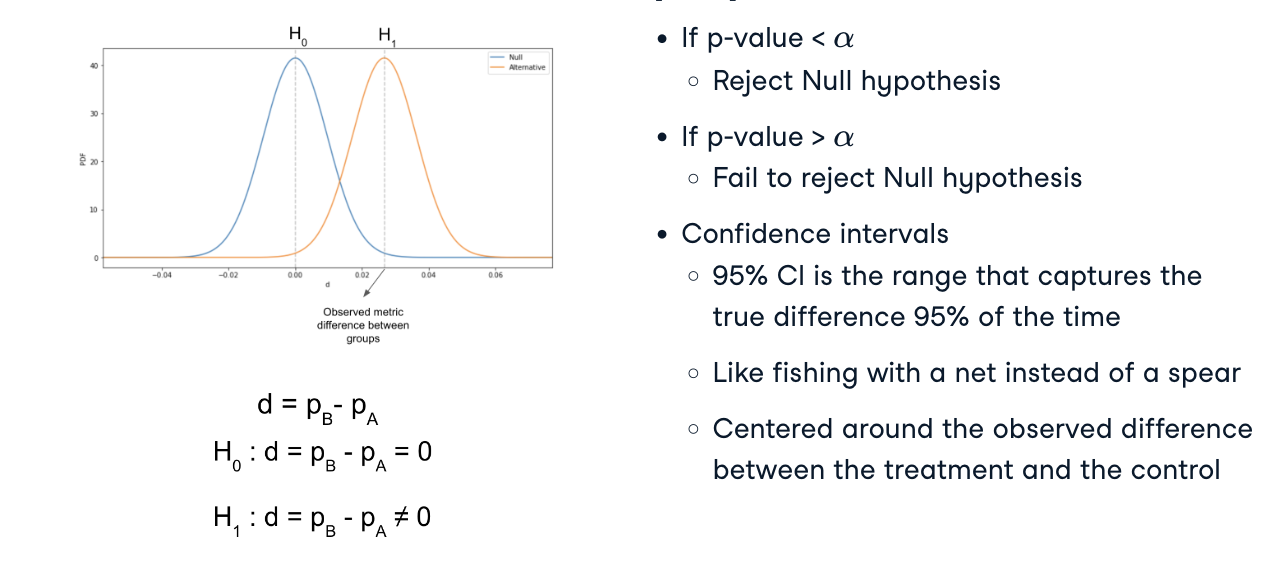

In [ ]:
# Two sample proportions z-test

from statmodels.stats.proportion import proportions_ztest, proportion_confint

# Calculate the number of users in groups A and B
n_A = checkout[checkout['checkout_page'] == 'A']['userid'].nunique()
n_B = checkout[checkout['checkout_page'] == 'B']['userid'].nunique()

print('Group A users: ', n_A)
print('Group B users: ', n_B)

# Compute unique purchasers in each group
purchased_A = checkout[checkout['checkout_page'] == 'A'].groupby('user_id')['purchased'].max().sum()
purchased_B = checkout[checkout['checkout_page'] == 'B'].groupby('user_id')['purchased'].max().sum()

# Assign groups lists
purchasers_abtest = [purchased_A, purchased_B]
n_abtest = [n_A, n_B]

# Calculate p-value and confidence intervals
z_stat, pvalue = proportions_ztest(purchasers_abtest, nobs=n_abtest)
(A_lo95, B_lo95), (A_up95, B_up95) = proportions_confint(purchasers_abtest, nobs=n_abtest, alpha=.05)

# Print the p-value and confidence invtervals
print(f'p-value is {pvalue:.4f}')
print(f'Group A 95% CI: [{A_lo95:.4f}, {A_up95:.4f}]')
print(f'Group B 95% CI: [{B_lo95:.4f}, {B_up95:.4f}]')

# Set random seed for repeatability
np.random.seed(34)

# Calculate the average purchase rate for group A
pop_mean = checkout[checkout['checkout_page'] == 'B']['purchased'].mean()

# Calculate 20 90% confidence intervals for 20 random samples of size 100 each

for i in range(20):
    confidence_interval = proportion_confint(
    count=checkout[checkout['checkout_page'] == 'B'].sample(100)['purchased'].sum(),
    nobs=100,
    alpha= (1 - .9)
    )
    print(f"For {i}: {confidence_interval}")
    
## Since the p-value is lower than the significance threshold of 0.05
## we can reject the Null hypothesis that the rates are equal.

* ***Tricky notes:***
- For the same test, the 99% confidence interval will be wider than the 95%. For example, we can be 80% confident that the average male height in the US is between 5'7" and 5'10", but we are much more confident it is between 4' and 7'.
- Confidence intervals give us the long-term probability that a range of plausible values would cover the population mean.